<a href="https://colab.research.google.com/github/sriRuchitha/OIB-SIP/blob/main/Project_3_Proposal_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab cell (bash)
!pip install -q numpy pandas scikit-learn matplotlib seaborn imbalanced-learn xgboost shap joblib streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.1 MB/s eta 0:00:00


In [2]:
# Python cell
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
RANDOM_STATE = 42


In [4]:
from google.colab import files
uploaded = files.upload()



Saving creditcard.csv to creditcard.csv


In [5]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))
print(df.shape)
df.head()


(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class counts:
 Class
0    284315
1       492
Name: count, dtype: int64
Percent fraud: 0.172749%


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


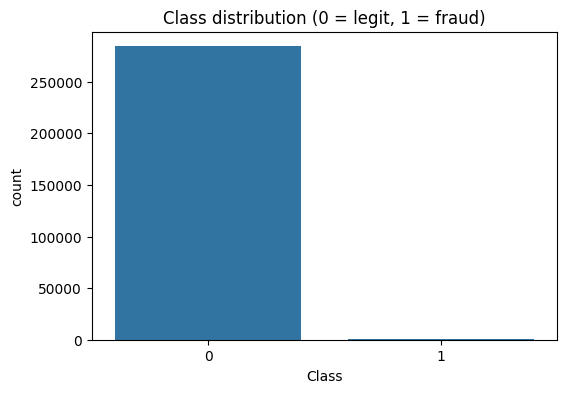

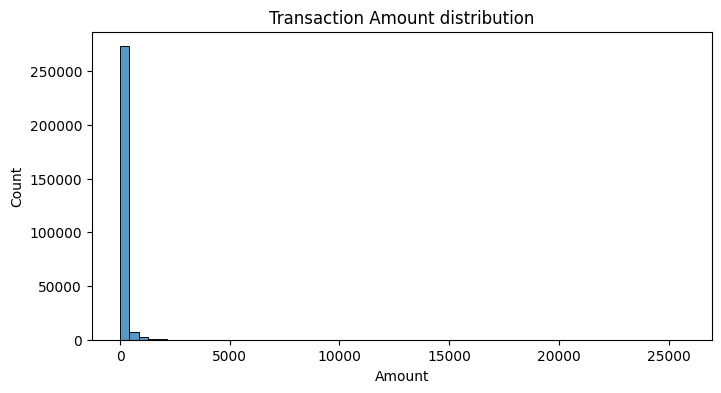

In [6]:
# class distribution
print("Class counts:\n", df['Class'].value_counts())
print("Percent fraud: {:.6f}%".format(df['Class'].mean()*100))

# basic stats
display(df.describe().T)

# plots
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class distribution (0 = legit, 1 = fraud)')
plt.show()

# Amount distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=60)
plt.title('Transaction Amount distribution')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and label
FEATURES = [c for c in df.columns if c != 'Class']
X = df[FEATURES].copy()
y = df['Class'].copy()

# Scale Time and Amount
scaler_amt_time = StandardScaler()
X[['Time','Amount']] = scaler_amt_time.fit_transform(X[['Time','Amount']])

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)
print("Train:", X_train.shape, "Test:", X_test.shape)
print("Train class balance:\n", y_train.value_counts(normalize=True))


Train: (227845, 30) Test: (56962, 30)
Train class balance:
 Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64


In [8]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, confusion_matrix, classification_report, f1_score

def evaluate_model(y_true, y_proba, threshold=0.5, show_report=True):
    y_pred = (y_proba >= threshold).astype(int)
    roc = roc_auc_score(y_true, y_proba)
    p, r, _ = precision_recall_curve(y_true, y_proba)
    pr_auc = auc(r, p)
    cm = confusion_matrix(y_true, y_pred)
    if show_report:
        print(f"ROC AUC: {roc:.4f} | PR AUC: {pr_auc:.4f}")
        print("Confusion matrix:\n", cm)
        print("\nClassification report (threshold={:.2f}):\n".format(threshold), classification_report(y_true, y_pred, digits=4))
    return {'roc_auc':roc, 'pr_auc':pr_auc, 'cm':cm, 'precision_recall_curve':(p,r)}

def plot_pr_curve(y_true, y_proba):
    p, r, _ = precision_recall_curve(y_true, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(r, p, label=f'PR (AUC={auc(r,p):.4f})')
    plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall curve')
    plt.legend(); plt.grid(True)
    plt.show()


ROC AUC: 0.9721 | PR AUC: 0.7639
Confusion matrix:
 [[55478  1386]
 [    8    90]]

Classification report (threshold=0.50):
               precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0610    0.9184    0.1144        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5510     56962
weighted avg     0.9982    0.9755    0.9861     56962



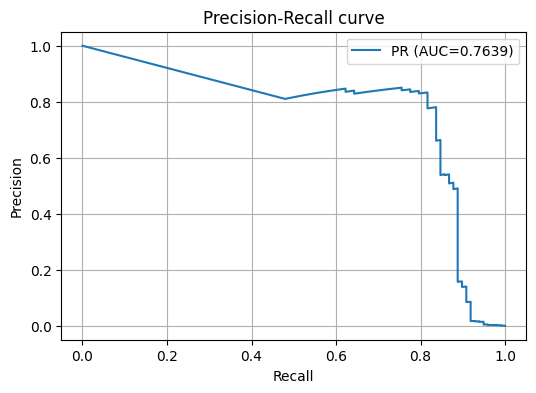

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

lr = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=RANDOM_STATE)
lr.fit(X_train, y_train)
y_proba_lr = lr.predict_proba(X_test)[:,1]
evaluate_model(y_test, y_proba_lr)
plot_pr_curve(y_test, y_proba_lr)


ROC AUC: 0.9572 | PR AUC: 0.8623
Confusion matrix:
 [[56861     3]
 [   24    74]]

Classification report (threshold=0.50):
               precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9610    0.7551    0.8457        98

    accuracy                         0.9995     56962
   macro avg     0.9803    0.8775    0.9227     56962
weighted avg     0.9995    0.9995    0.9995     56962



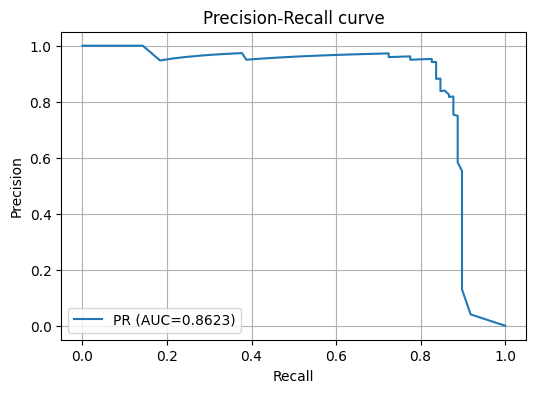

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', n_jobs=-1, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
y_proba_rf = rf.predict_proba(X_test)[:,1]
evaluate_model(y_test, y_proba_rf)
plot_pr_curve(y_test, y_proba_rf)


ROC AUC: 0.9699 | PR AUC: 0.7706
Confusion matrix:
 [[55402  1462]
 [    8    90]]

Classification report (threshold=0.50):
               precision    recall  f1-score   support

           0     0.9999    0.9743    0.9869     56864
           1     0.0580    0.9184    0.1091        98

    accuracy                         0.9742     56962
   macro avg     0.5289    0.9463    0.5480     56962
weighted avg     0.9982    0.9742    0.9854     56962



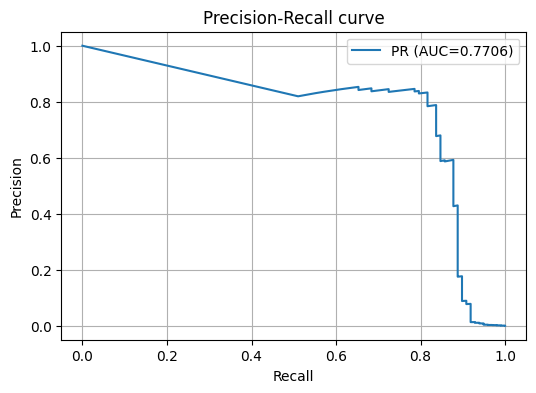

In [12]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

smote = SMOTE(random_state=RANDOM_STATE)

pipe_smote_lr = ImbPipeline([
    ('smote', smote),
    ('clf', LogisticRegression(solver='liblinear', random_state=RANDOM_STATE))
])

pipe_smote_lr.fit(X_train, y_train)
y_proba_smote_lr = pipe_smote_lr.predict_proba(X_test)[:,1]

evaluate_model(y_test, y_proba_smote_lr)
plot_pr_curve(y_test, y_proba_smote_lr)
q 1

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:53:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


ROC AUC: 0.9745 | PR AUC: 0.8740
Confusion matrix:
 [[56853    11]
 [   16    82]]

Classification report (threshold=0.50):
               precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     56864
           1     0.8817    0.8367    0.8586        98

    accuracy                         0.9995     56962
   macro avg     0.9407    0.9183    0.9292     56962
weighted avg     0.9995    0.9995    0.9995     56962



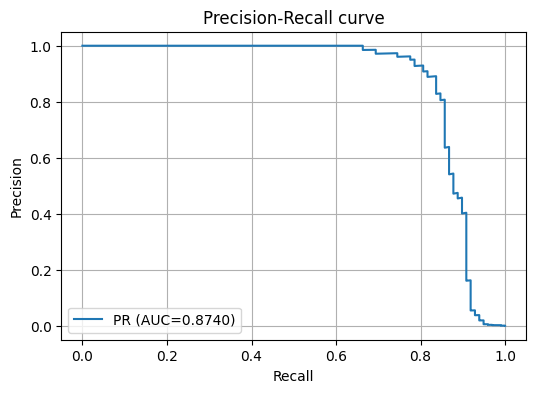

In [15]:
import xgboost as xgb

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

model_xgb = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# NO early stopping (old xgboost)
model_xgb.fit(X_train, y_train)

# predictions
y_proba_xgb = model_xgb.predict_proba(X_test)[:,1]

evaluate_model(y_test, y_proba_xgb)
plot_pr_curve(y_test, y_proba_xgb)


In [17]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# Use predictions from your chosen model. Replace `y_proba_xgb` with your final model's y_proba.
probas = y_proba_xgb  # or y_proba_best if you used RandomizedSearchCV result

p, r, thresholds = precision_recall_curve(y_test, probas)

# Compute F1 for each threshold
f1_scores = 2 * (p * r) / (p + r + 1e-12)
best_idx = np.argmax(f1_scores)
best_thr = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
print(f"Best F1={f1_scores[best_idx]:.4f} at threshold={best_thr:.4f}")

# If you want a threshold for a target precision (e.g., 0.9)
target_precision = 0.90
ix = np.where(p >= target_precision)[0]
if len(ix) > 0:
    thr_for_precision = thresholds[ix[0]] if ix[0] < len(thresholds) else thresholds[-1]
    print(f"Threshold achieving precision >= {target_precision:.2f}: {thr_for_precision:.4f} (precision={p[ix[0]]:.4f}, recall={r[ix[0]]:.4f})")
else:
    print(f"No threshold achieves precision >= {target_precision:.2f}")

# Evaluate with chosen threshold(s)
evaluate_model(y_test, probas, threshold=best_thr)
if len(ix)>0:
    evaluate_model(y_test, probas, threshold=thr_for_precision)


Best F1=0.8634 at threshold=0.9291
Threshold achieving precision >= 0.90: 0.8805 (precision=0.9091, recall=0.8163)
ROC AUC: 0.9745 | PR AUC: 0.8740
Confusion matrix:
 [[56858     6]
 [   19    79]]

Classification report (threshold=0.93):
               precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9294    0.8061    0.8634        98

    accuracy                         0.9996     56962
   macro avg     0.9645    0.9030    0.9316     56962
weighted avg     0.9995    0.9996    0.9995     56962

ROC AUC: 0.9745 | PR AUC: 0.8740
Confusion matrix:
 [[56856     8]
 [   18    80]]

Classification report (threshold=0.88):
               precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9091    0.8163    0.8602        98

    accuracy                         0.9995     56962
   macro avg     0.9544    0.9081    0.9300     56962
weighted avg     0.9995    0.9995   

Fitting 4 folds for each of 20 candidates, totalling 80 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:04:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
ROC AUC: 0.9843 | PR AUC: 0.8782
Confusion matrix:
 [[56848    16]
 [   15    83]]

Classification report (threshold=0.50):
               precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8384    0.8469    0.8426        98

    accuracy                         0.9995     56962
   macro avg     0.9191    0.9233    0.9212     56962
weighted avg     0.9995    0.9995    0.9995     56962



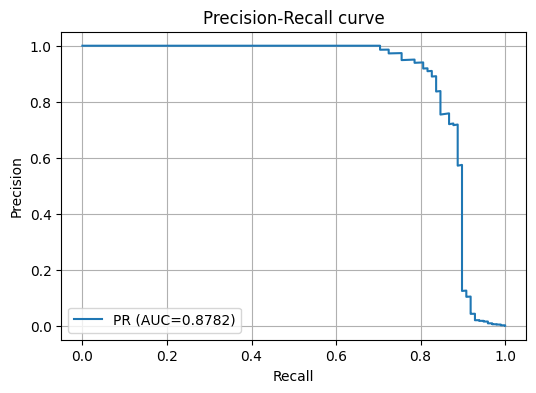

In [18]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
import xgboost as xgb

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=RANDOM_STATE)
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_est = xgb.XGBClassifier(use_label_encoder=False, eval_metric='auc', n_jobs=-1, random_state=RANDOM_STATE, scale_pos_weight=scale_pos_weight)

param_dist = {
    'n_estimators': [100,200,400],
    'max_depth': [3,4,5,6],
    'learning_rate': [0.01,0.03,0.05,0.1],
    'subsample': [0.6,0.8,1.0],
    'colsample_bytree': [0.6,0.8,1.0],
    'reg_alpha': [0,0.1,1],
    'reg_lambda': [1,2,5]
}

rsearch = RandomizedSearchCV(
    estimator=xgb_est,
    param_distributions=param_dist,
    n_iter=20,
    scoring='average_precision',   # PR AUC proxy
    cv=skf,
    verbose=2,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rsearch.fit(X_train, y_train)
print("Best params:", rsearch.best_params_)
best_model = rsearch.best_estimator_
y_proba_best = best_model.predict_proba(X_test)[:,1]
evaluate_model(y_test, y_proba_best)
plot_pr_curve(y_test, y_proba_best)
